In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<span style="font-size: 30px; color:blue"> 1.1 Null data Check </span> 

In [6]:
for col in df_train.columns:
    msg = 'column:{:<10}\t Percent of NaN value: {:.2f}%'.format(col, 
    100 * (df_train[col].isnull().sum()) / df_train[col].shape[0])
    print(msg)

column:PassengerId	 Percent of NaN value: 0.00%
column:Survived  	 Percent of NaN value: 0.00%
column:Pclass    	 Percent of NaN value: 0.00%
column:Name      	 Percent of NaN value: 0.00%
column:Sex       	 Percent of NaN value: 0.00%
column:Age       	 Percent of NaN value: 19.87%
column:SibSp     	 Percent of NaN value: 0.00%
column:Parch     	 Percent of NaN value: 0.00%
column:Ticket    	 Percent of NaN value: 0.00%
column:Fare      	 Percent of NaN value: 0.00%
column:Cabin     	 Percent of NaN value: 77.10%
column:Embarked  	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column:{:<10}\t Percent of NaN value: {:.2f}%'.format(col, 
    100 * (df_test[col].isnull().sum()) / df_test[col].shape[0])
    print(msg)

column:PassengerId	 Percent of NaN value: 0.00%
column:Pclass    	 Percent of NaN value: 0.00%
column:Name      	 Percent of NaN value: 0.00%
column:Sex       	 Percent of NaN value: 0.00%
column:Age       	 Percent of NaN value: 20.57%
column:SibSp     	 Percent of NaN value: 0.00%
column:Parch     	 Percent of NaN value: 0.00%
column:Ticket    	 Percent of NaN value: 0.00%
column:Fare      	 Percent of NaN value: 0.24%
column:Cabin     	 Percent of NaN value: 78.23%
column:Embarked  	 Percent of NaN value: 0.00%


<AxesSubplot:>

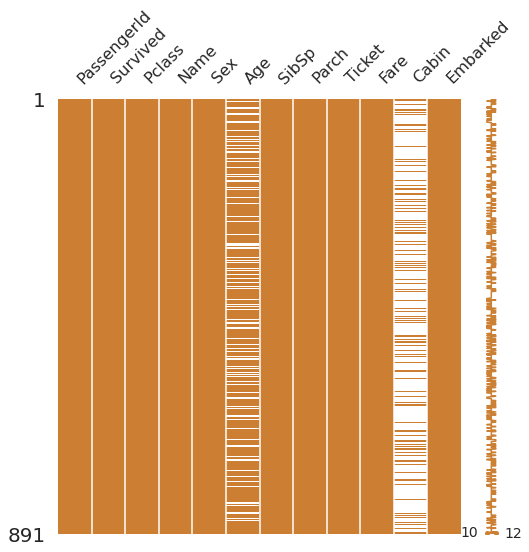

In [8]:
msno.matrix(df = df_train, figsize = (8,8), color = (0.8, 0.5, 0.2))

<AxesSubplot:>

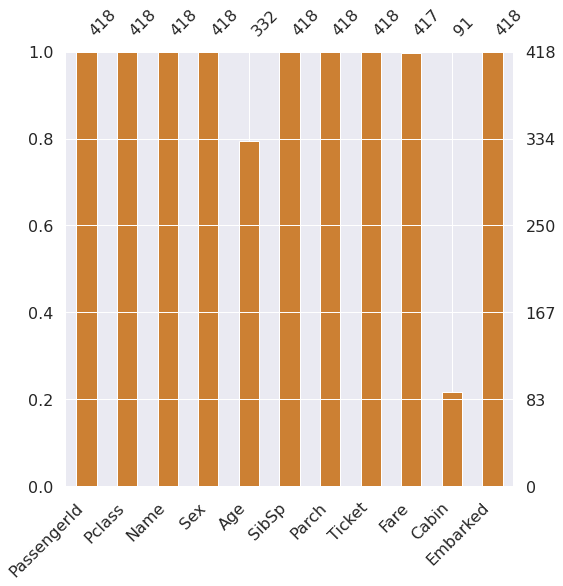

In [9]:
msno.bar(df=df_test, figsize=(8,8), color=(0.8, 0.5, 0.2))

* #### Train에서는 Age(19.87%), Cabin(77.10%)에 Null Date가 존재한다.
* #### Test에서는 Age(20.57%), Fare(0.24%), Cabin(78.23%)에 Null Date가 존재한다.



<span style="font-size: 30px; color:blue"> 1.2 Target Label의 Distribution 확인 </span> 

Text(0.5, 1.0, 'Count plot - Survived')

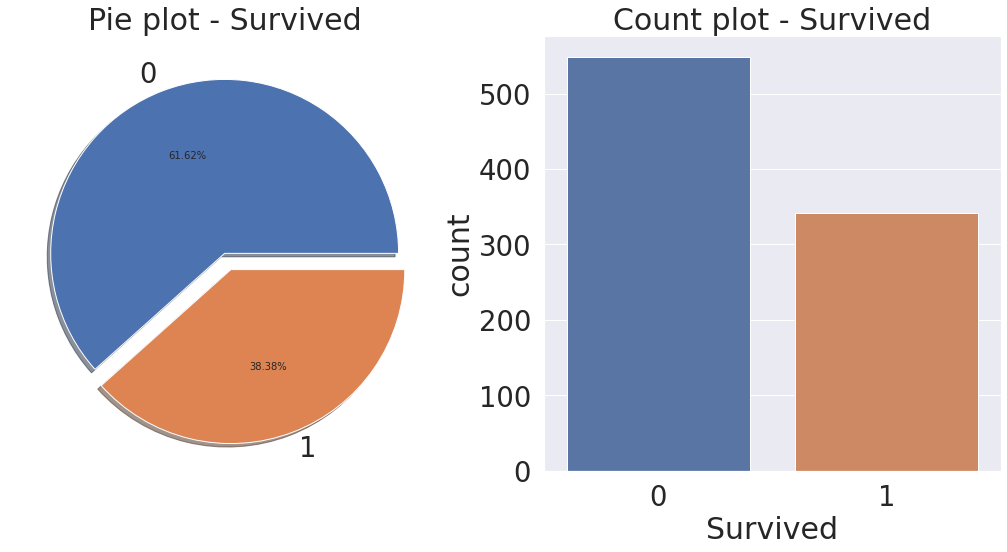

In [10]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

* #### 38.4%가 살아남았습니다.
* #### target label의 분포가 제법 균일(balanced)합니다.

<span style="font-size: 30px; color:blue"> 2.1 EDA_P-class </span> 

In [11]:
df_train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
df_train[['Survived','Pclass']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [14]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


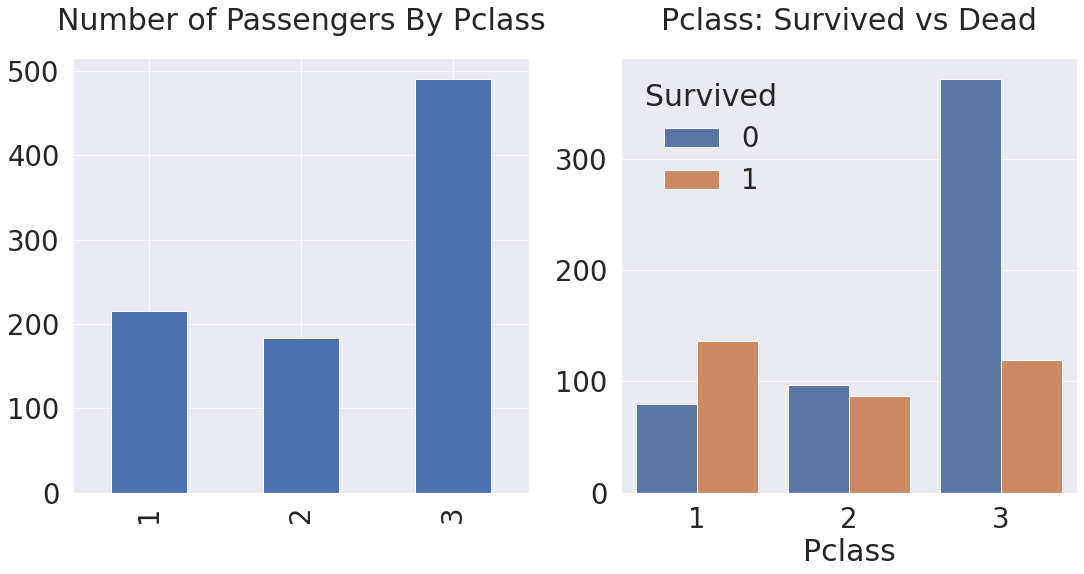

In [15]:
y_position = 1.05
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().sort_index().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)

sns.countplot('Pclass', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
ax[1].set_ylabel('')

plt.show()

* #### Pclass가 높은 단계일수록 생존율이 높은 것을 알 수 있다.
* #### Pclass가 생존에 큰 영향을 미침으로 추후 모델을 세울 때 'Pclass'는 feature로 사용하기에 적합하다.

<span style="font-size: 30px; color:blue"> 2.2 EDA_Sex </span> 

In [16]:
df_train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


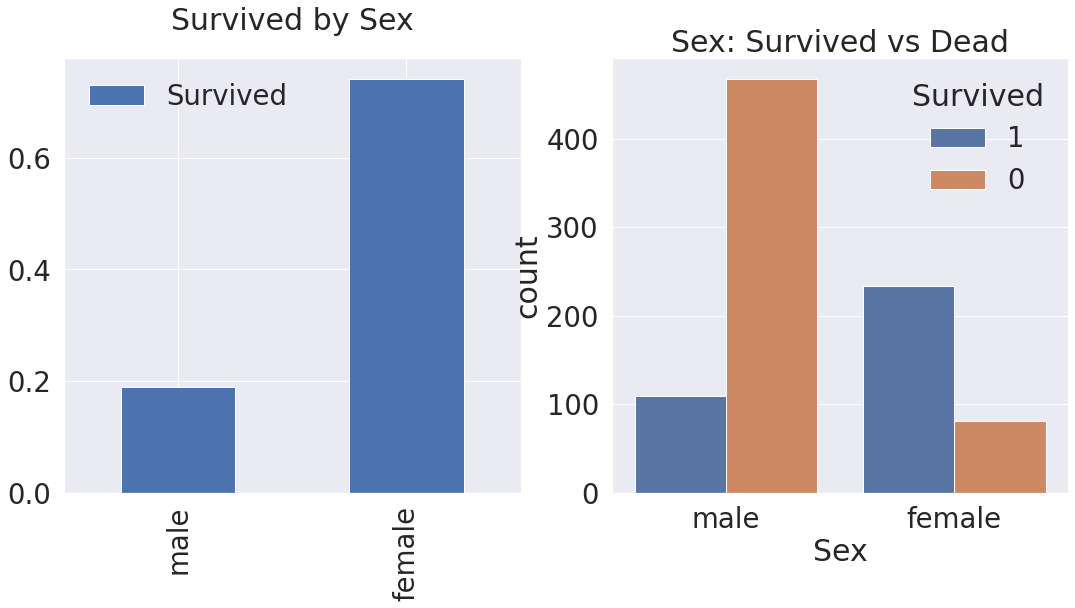

In [18]:
y_position = 1.05
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by = 'Survived').plot.bar(ax=ax[0])
ax[0].set_title('Survived by Sex', y = y_position)
ax[0].set_xlabel('')

sns.countplot('Sex', hue = 'Survived', data = df_train, hue_order = [1,0], ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

* #### 여성이 남성보다 생존율이 훨씬 높다.
* #### Sex도 생존에 큰 영향을 미침으로 추후 모델을 세울 때 feature로 사용하기 적합하다.

<span style="font-size: 30px; color:blue"> 2.3 Both Pclass and Sex </span> 

* #### 이번에는 Sex와 Pclass에 따른 생존율이 어떻게 되는지 확인해보자.
* #### seaborn의 factorplot을 이용하면  categorical plot을 그리기 쉽다.

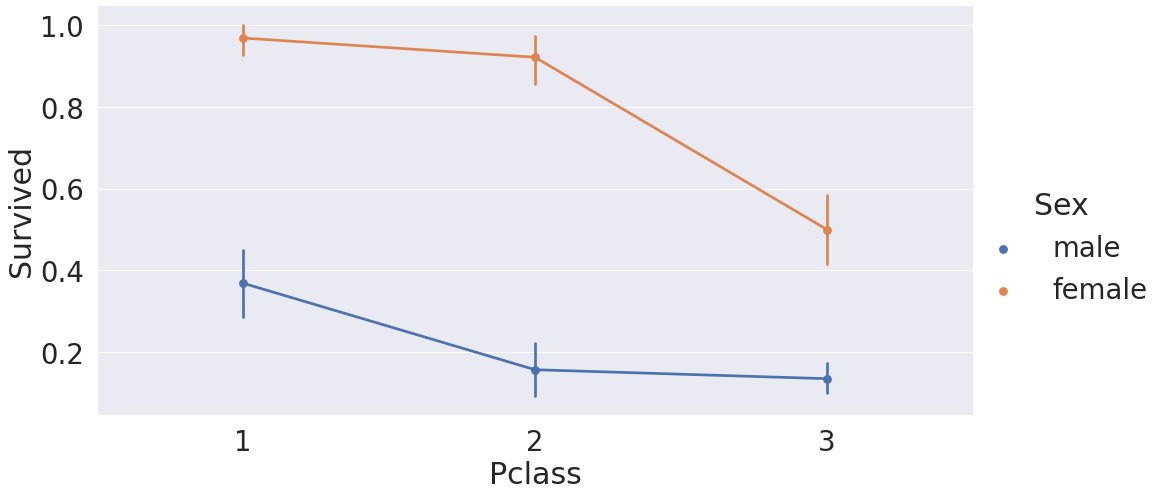

In [19]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=7, aspect=2)

* #### hue 대신 col을 사용하면 아래와 같아짐

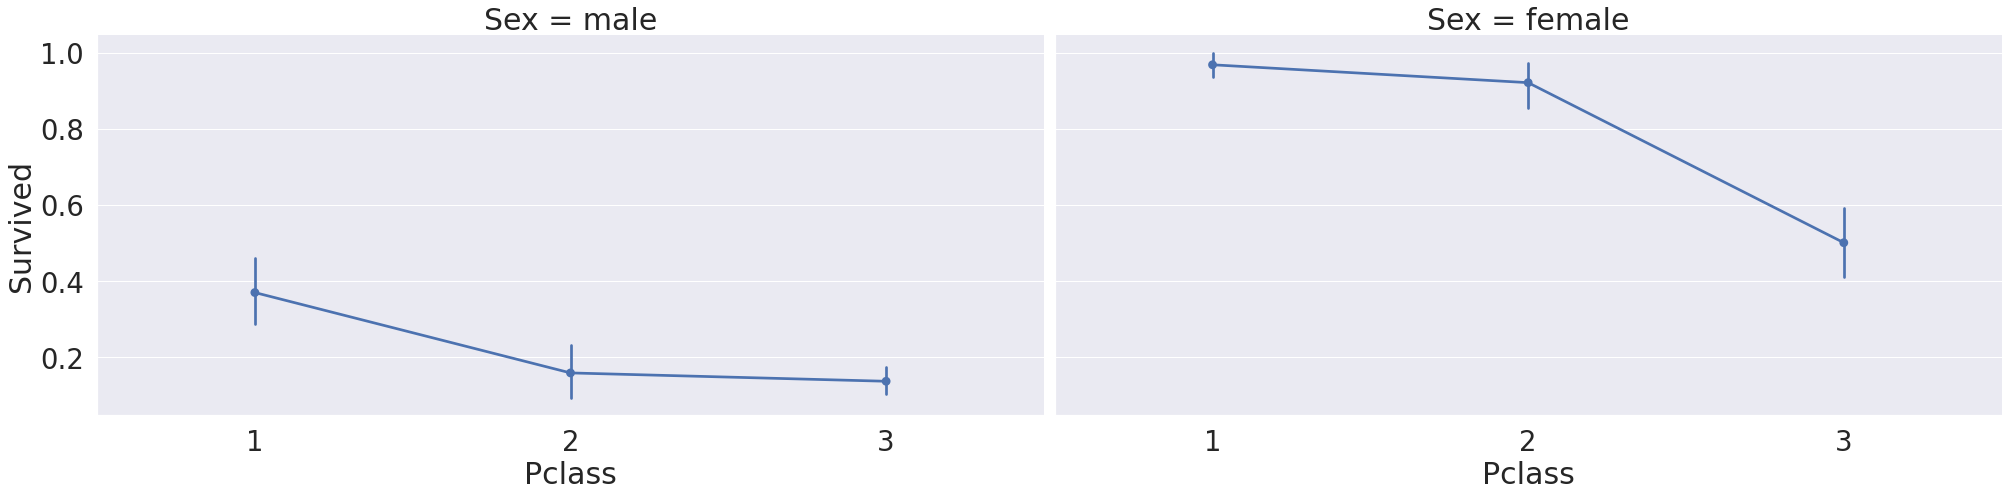

In [20]:
sns.factorplot('Pclass','Survived', col='Sex', data=df_train, size=7, aspect=2)

* #### 모든 Pclass에서 여성의 생존율이 남성보다 높다는 걸 알 수 있다.
* #### 또한 클래스가 높을수록 살 확률이 높아진다.

<span style="font-size: 30px; color:blue"> 2.4 Age </span> 

* #### 'Age'_Feature을 살펴보자.

In [21]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


* #### 탑승객의 나이 따른 KDE를 보자.

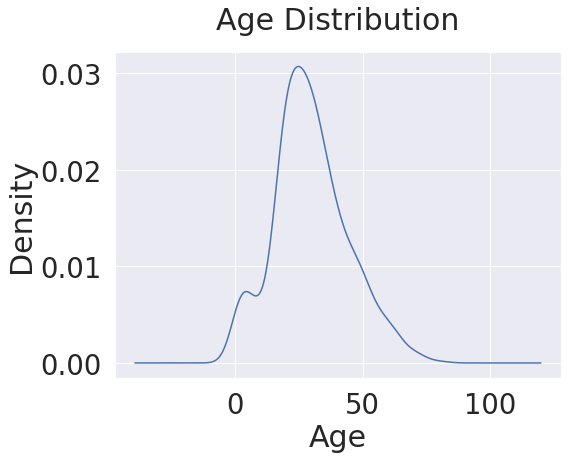

In [22]:
plt.figure(figsize=(8,6))
df_train['Age'].plot(kind='kde')
plt.title('Age Distribution', y= 1.05)
plt.xlabel('Age')
plt.show()

* #### 나이는 평균 약 30세를 기점으로 분포되어 있음을 확인할 수 있다.
* #### 다음으로는 나이에 따른 생존자의 분포를 확인해보자.

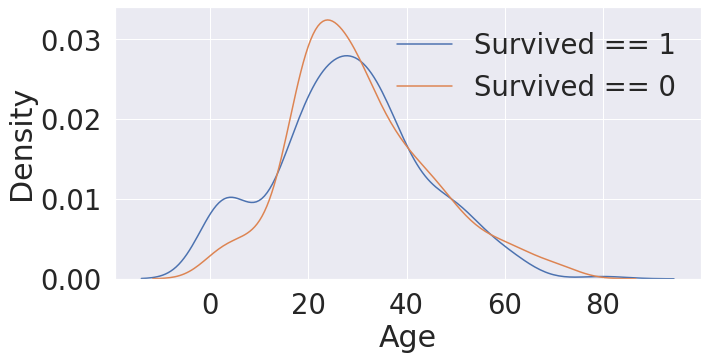

In [23]:
fig, ax = plt.subplots(1,1, figsize = (10.5,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

* #### 나이가 젊을수록 생존율이 높음을 확인할 수 있다.
* #### 하지만, 나이가 젊을수록 사망율도 높다.
* #### 다음으로는 Pclass 별 나이 분포도를 살펴보자.

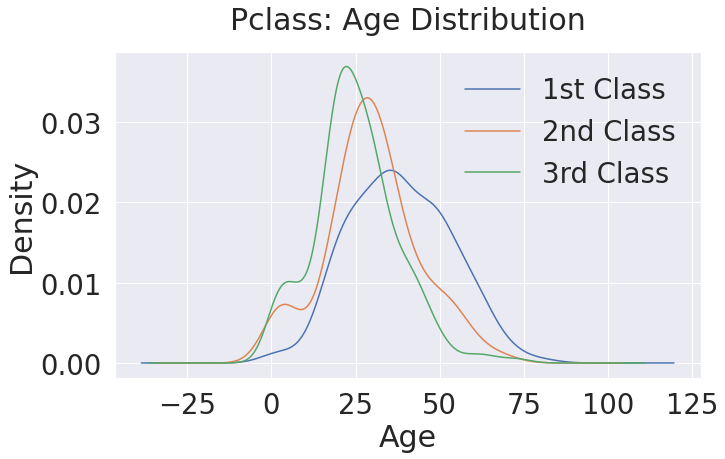

In [24]:
plt.figure(figsize=(10.5,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.title('Pclass: Age Distribution', y = 1.05)
plt.xlabel('Age')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

* #### Pclass 단계가 높을수록 평균 나이가 증가하는 것을 알 수 있다.
* #### 다음으로는 Pclass별 나이에 따른 생존율을 살펴보자.

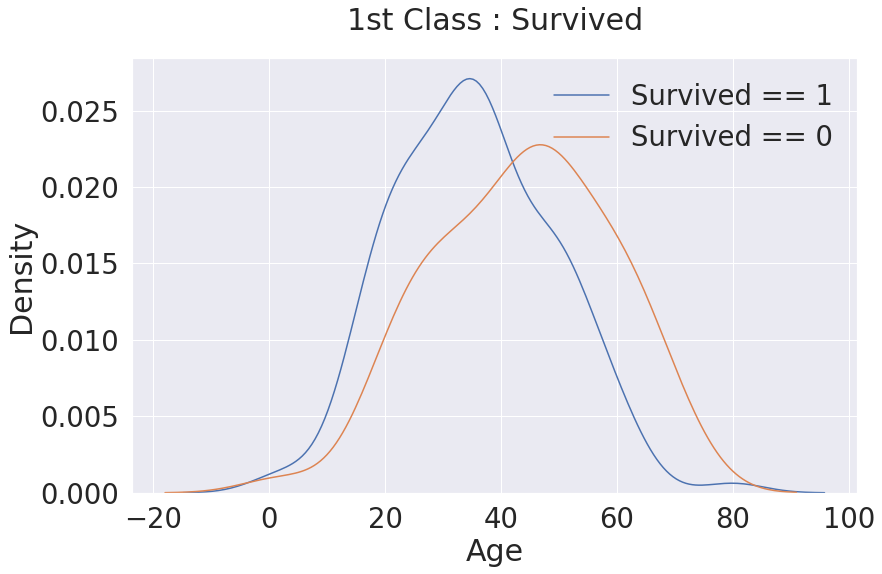

In [25]:
f, ax = plt.subplots(1,1, figsize=(13,8))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train['Age'][(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)], ax=ax)
plt.title('1st Class : Survived', y = 1.05)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

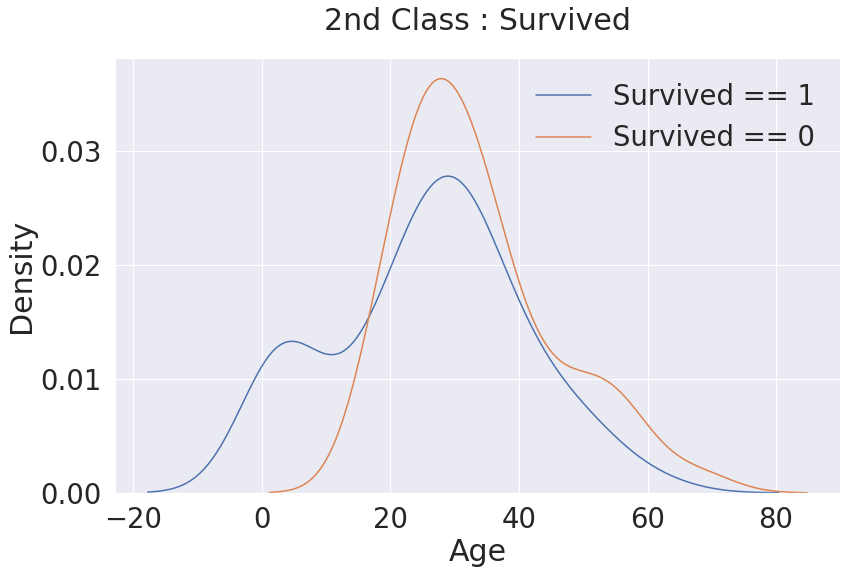

In [26]:
f,ax = plt.subplots(1,1, figsize=(13,8))
sns.kdeplot(df_train['Age'][(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)], ax = ax)
sns.kdeplot(df_train['Age'][(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)], ax = ax)
plt.title('2nd Class : Survived', y= 1.05)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

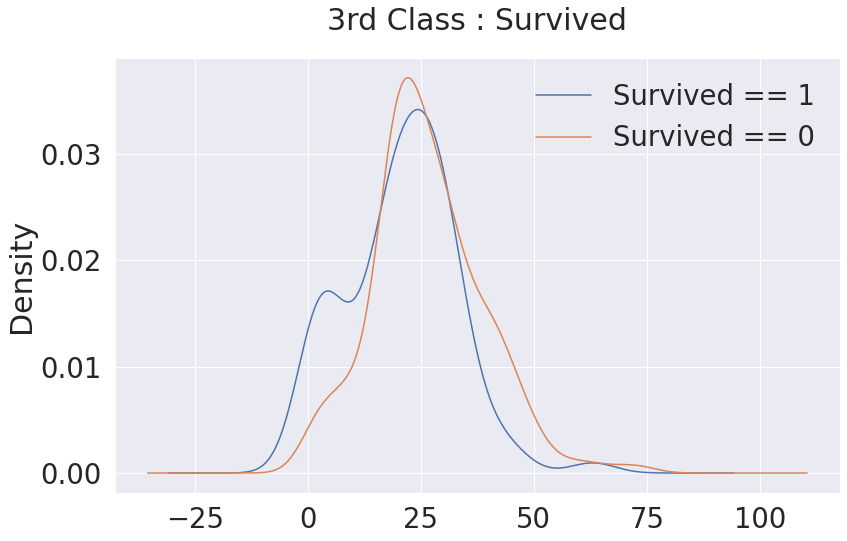

In [27]:
plt.figure(figsize=(13,8))
df_train['Age'][(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)].plot(kind='kde')
df_train['Age'][(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)].plot(kind='kde')
plt.title('3rd Class : Survived', y = 1.05)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

* #### Pclass별 생존 현황을 살펴보면 젊은 사람일수록 생존할 확률이 높은 것을 확인할 수 있다.
* #### 다음으로는 나이 구간별 생존율을 살펴보자.

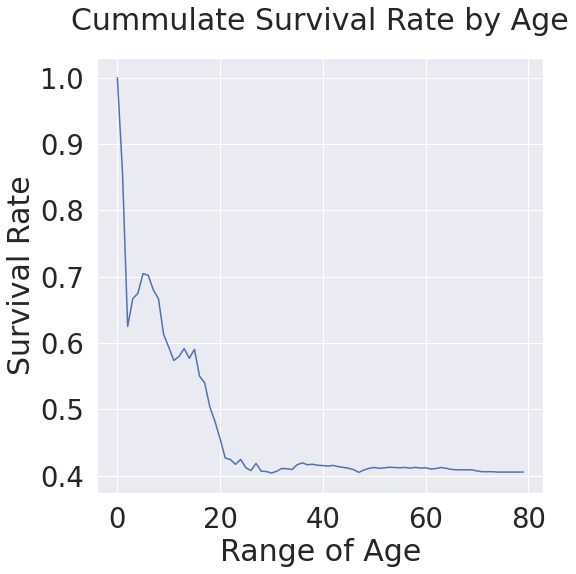

In [28]:
cummulate_survival_ratio = []
for i in range(1, 81):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / 
    len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize = (8,8))
plt.plot(cummulate_survival_ratio)
plt.title('Cummulate Survival Rate by Age', y = 1.05)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age')
plt.show()

* #### 나이가 어릴수록 생존율이 높다는 것을 확인할 수 있다.
* #### 나이가 중요한 feature임을 알 수 있다.

<span style="font-size: 30px; color:blue"> 2.5 Pclass, Sex, Age</span> 

* #### seaborn의 violinplot을 활용해서 Pclass, Sex, Age를 모두 살펴보자  

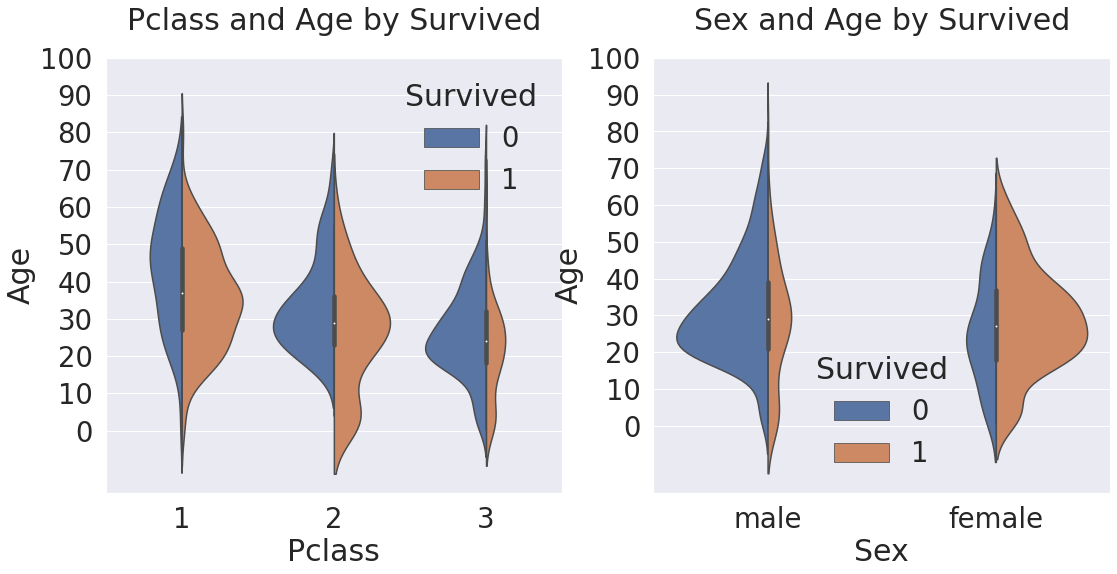

In [29]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot("Pclass", "Age", hue = "Survived", data = df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age by Survived', y = 1.05)
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", "Age", hue= "Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age by Survived', y = 1.05)
ax[1].set_yticks(range(0,110,10))

plt.show()

* #### violinplot를 통해 클래스가 높고 여자이면서 젊을수록 생존율이 높다는 것을 확인할 수 있다.

<span style="font-size: 30px; color:blue"> 2.6 Embarked </span> 

* #### 이번에는 탑승한 곳에 따른 생존율을 살펴보자

<AxesSubplot:xlabel='Embarked'>

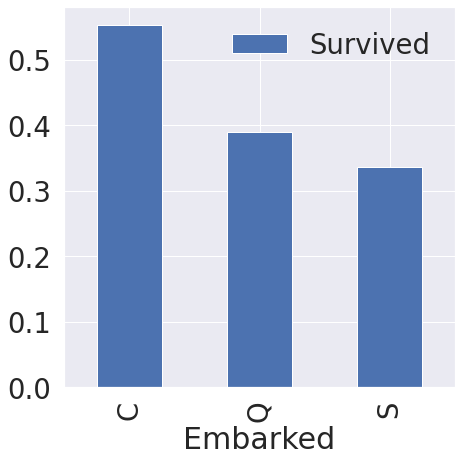

In [30]:
f, ax = plt.subplots(1,1, figsize = (7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax = ax)

* #### 다른 feature별로 나눠서 살펴보자

Text(0.5, 1.0, 'Embarked By Pclass')

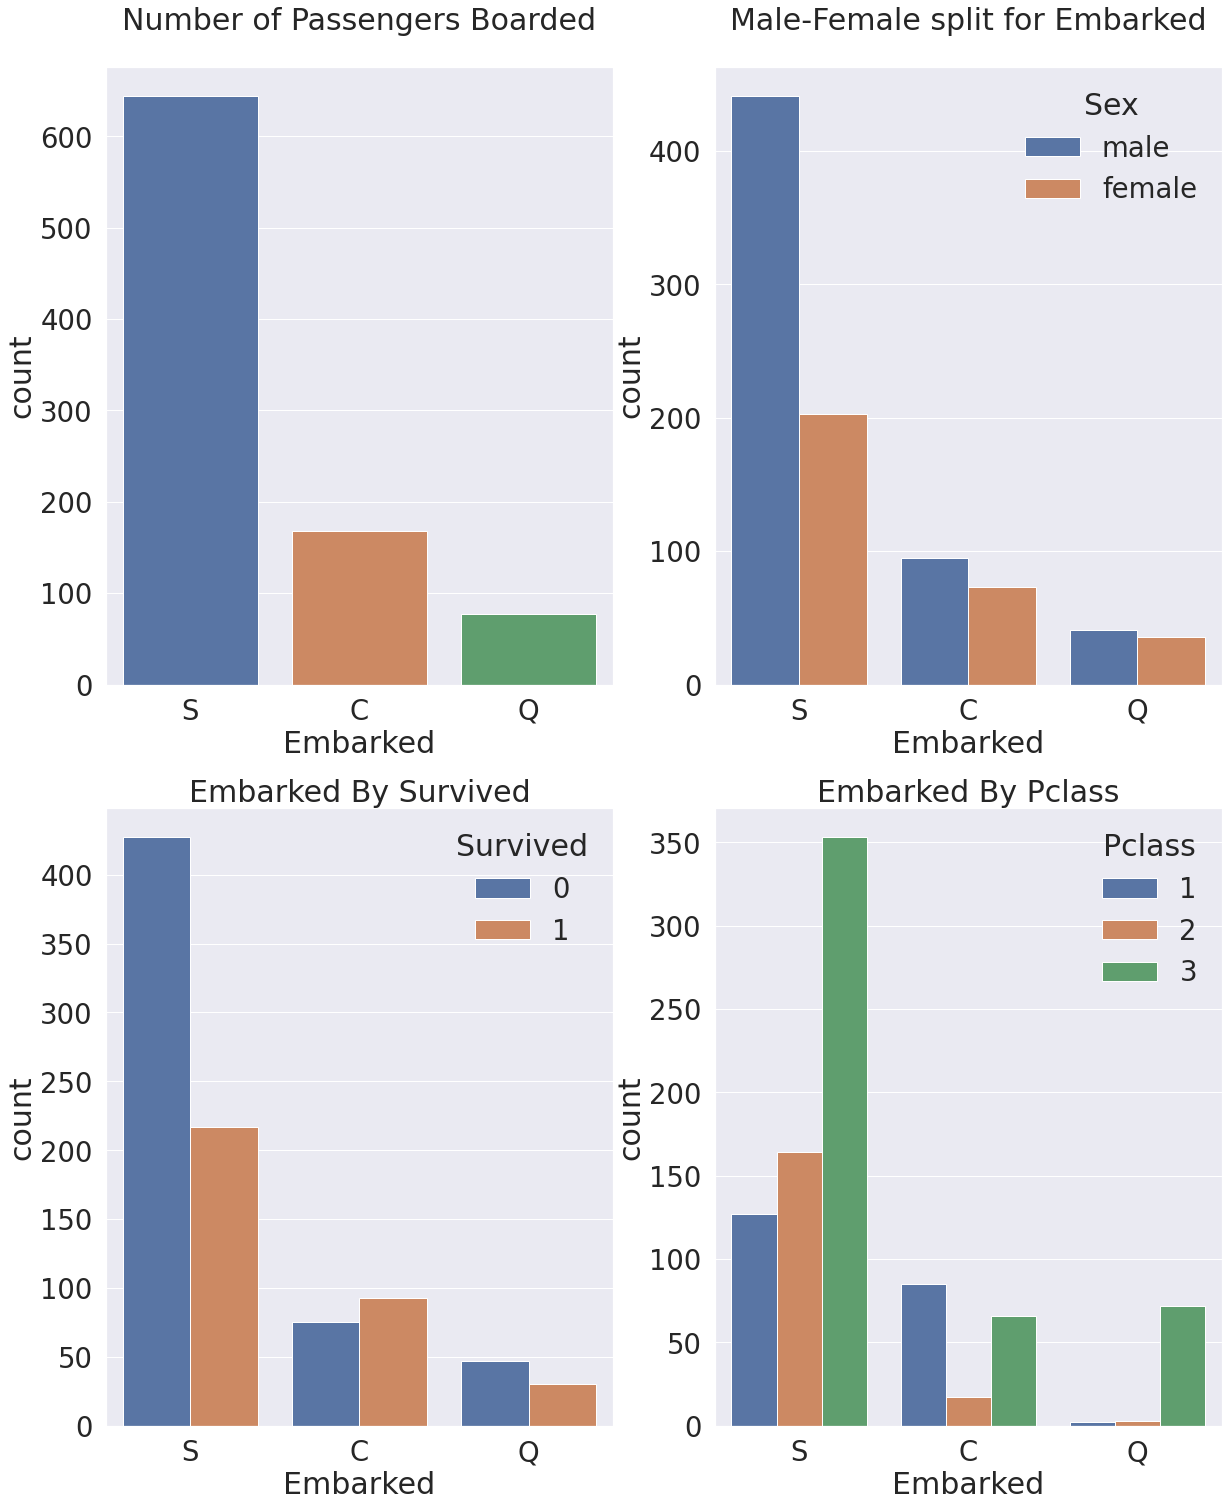

In [31]:
f, ax = plt.subplots(2,2, figsize=(20,25))
sns.countplot('Embarked', data = df_train, ax=ax[0,0])
ax[0,0].set_title('Number of Passengers Boarded', y = 1.05)
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embarked', y = 1.05)
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax=ax[1,0])
ax[1,0].set_title('Embarked By Survived')
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax=ax[1,1])
ax[1,1].set_title('Embarked By Pclass')

* #### 자료를 보면 S에서 생존율이 가장 낮고 C에서 생존율이 가장 높다.
* #### S에서는 3등급이면서 남자인 사람이 가장 많이 탑승하였기에 생존율이 가장 낮은 것을 확인할 수 있다.
* #### C에서는 상대적으로 1등급인 사람이 많이 탔기 때문에 생존율이 높은 것을 알 수 있다.

<span style="font-size: 30px; color:blue"> 2.7 Family - SibSp(형제, 자매) + Parch(부모, 자녀) </span> 

* #### SibSp와 Parch를 합한 Family 단위로 살펴보자

In [32]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

print("Maximum size of Family:", df_train['FamilySize'].max())
print("Minimum size of Family:", df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


* #### FamilySize와 생존율의 관계를 살펴보자

Text(0.5, 1.05, 'Survived Rate by FamilySize')

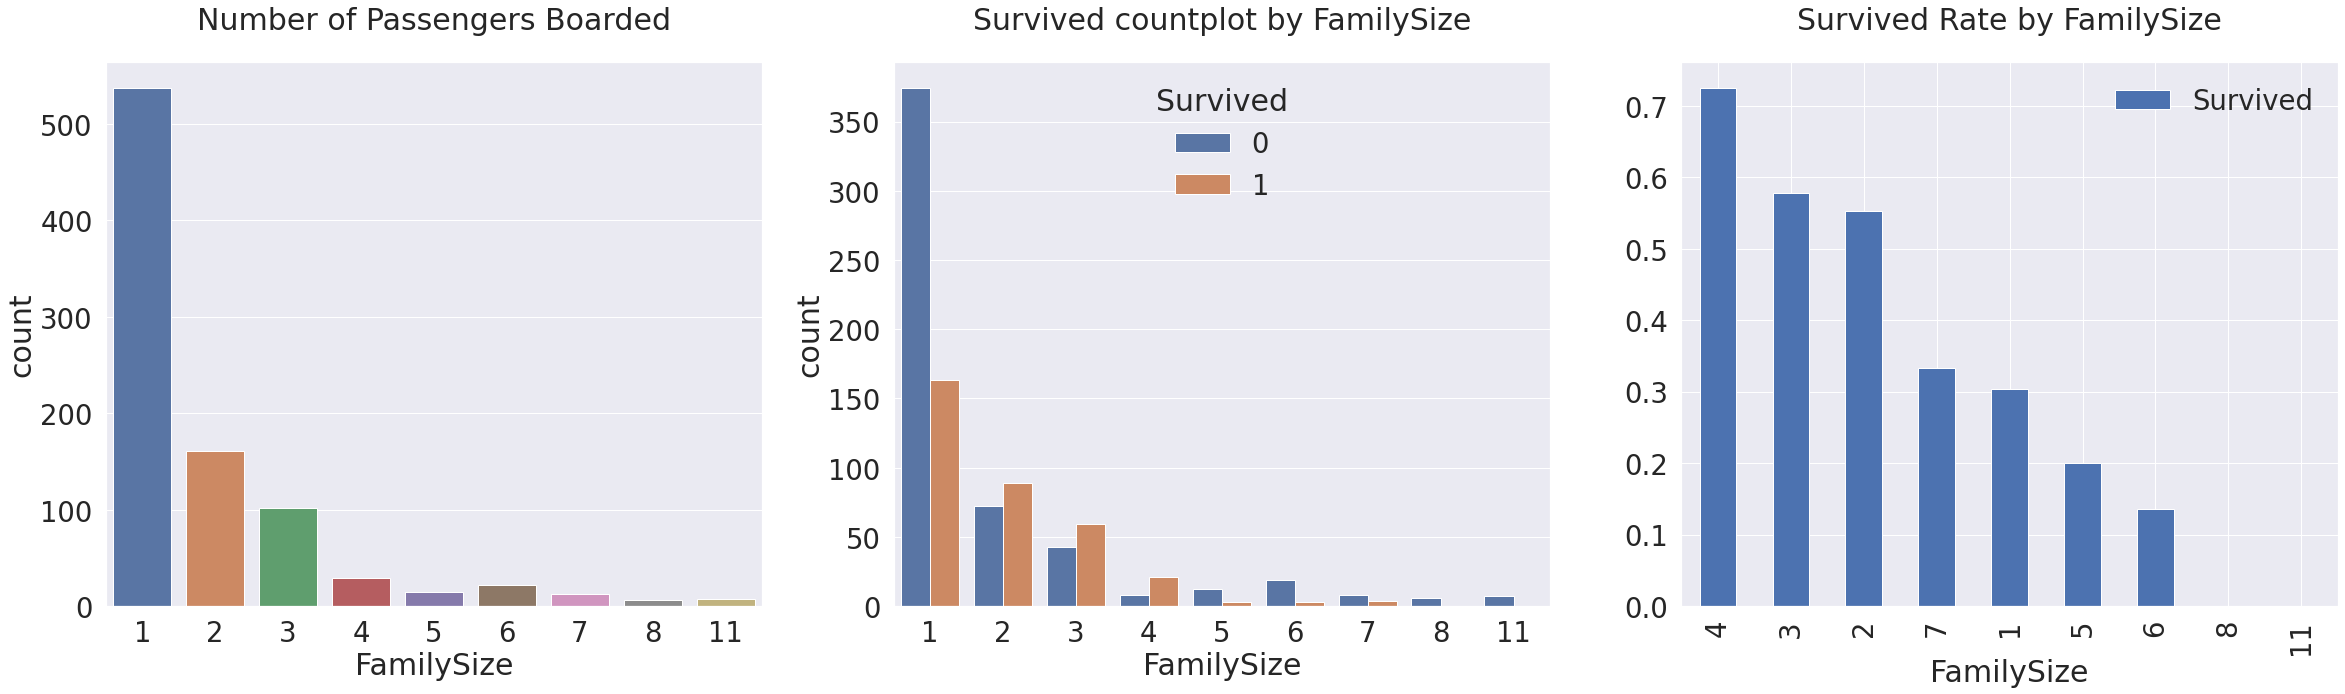

In [33]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data = df_train, ax = ax[0])
ax[0].set_title('Number of Passengers Boarded', y = 1.05)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax= ax[1])
ax[1].set_title('Survived countplot by FamilySize', y = 1.05)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False,).plot.bar(ax=ax[2])
ax[2].set_title('Survived Rate by FamilySize', y = 1.05)

* #### 가족 크기는 1~11까지 존재한다
* #### 가족 크기가 4명일 때가 생존율이 가장 높다. 하지만 가족 크기가 4명보다 높아지면 생존율이 급격히 떨어진다.
* #### 가족 크기가 3~4명일 때 생존율이 높은 걸 확인할 수 있다.

<span style="font-size: 30px; color:blue"> 2.8 Fare </span> 

* #### Fare은 탑승요금이며, continuous feature이다. Fare의 Histogram을 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

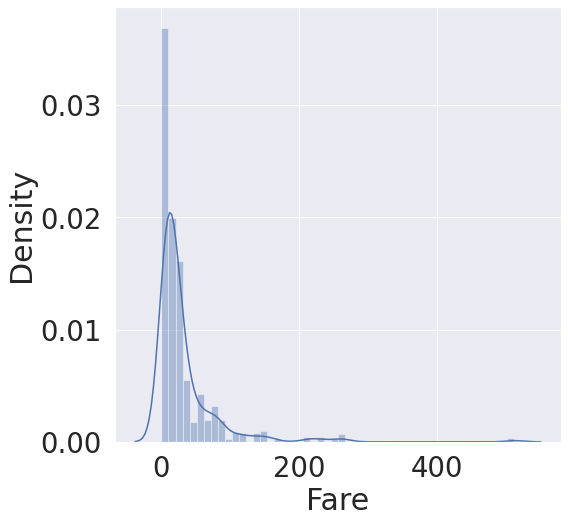

In [34]:
f, ax = plt.subplots(1,1, figsize = (8,8))
sns.distplot(df_train['Fare'], ax = ax)